# 라면 평가

## content

현재까지 2500개 이상의 리뷰했음, 데이터 세트는 CSV 형식으로 변환

데이터 세트의 각 기록은 라면 제품 하나의 리뷰다. 리뷰 수는 연속적이다, 최근에 검토한 라면 종류는 더 많은 숫자를 가지고 있다. 브랜드, 버라이어티(상품명), 컨트리, 스타일은 꽤 자기 설명적인 것이다

##inspairation

라면 포장 라벨에 가장 많이 광고되는 재료나 맛은?
라면 등급은 다른 식품의 등급과 어떻게 비교되는가?
라면 제조는 어떻게 국제적으로 유통되고 있는가?

In [0]:
# 데이터 불러오기 전 라이브러리 가져오기
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np

In [69]:
df_ramen = pd.read_csv('ramen-ratings.csv')
df_ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [70]:
df_ramen.shape

(2580, 7)

In [71]:
# 나라별에 따른 라면종류의 수
country_c = df_ramen['Country'].value_counts()
country_c

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Holland            4
Poland             4
Fiji               4
Dubai              3
Sweden             3
Sarawak            3
Finland            3
Estonia            2
Ghana              2
United States      1
Nigeria            1
Name: Country, dtype: int64

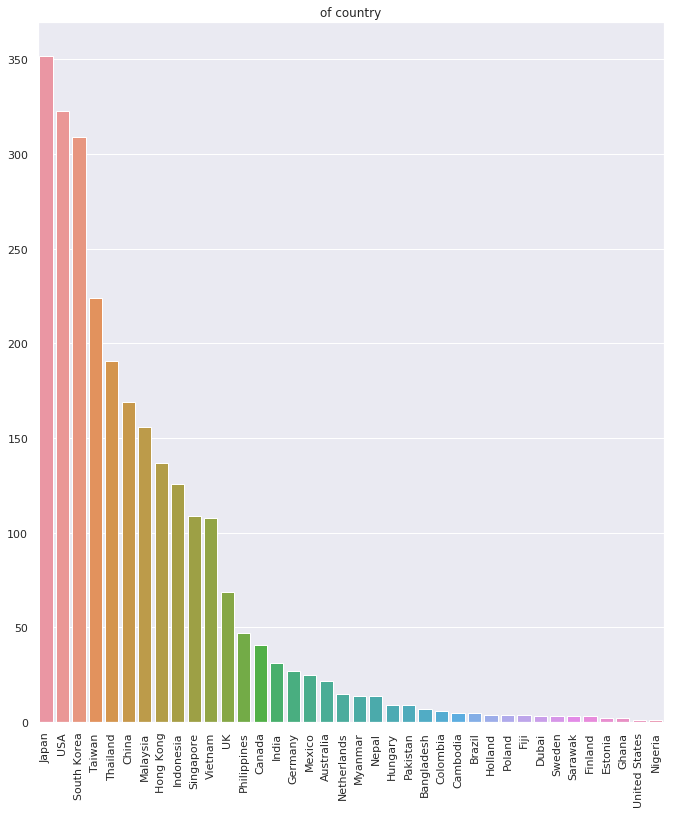

In [100]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(10, 12))
ax = sns.barplot(x=country_c.index, y=country_c.values)
ax.set_title('of country')
ax.set_xticklabels(country_c.index, rotation=90);

In [101]:
#
brand_c = df_ramen['Brand'].value_counts()
brand_c

Nissin                 381
Nongshim                98
Maruchan                76
Mama                    71
Paldo                   66
Myojo                   63
Indomie                 53
Samyang Foods           52
Ottogi                  46
Lucky Me!               34
Vina Acecook            34
Vifon                   33
Maggi                   30
Mamee                   29
Master Kong             28
MAMA                    27
A-Sha Dry Noodle        26
KOKA                    25
Wai Wai                 25
Sapporo Ichiban         25
MyKuali                 24
Ve Wong                 24
JML                     23
Samyang                 19
Koka                    18
Doll                    16
Batchelors              16
Acecook                 15
Kamfen                  15
Mr. Noodles             15
                      ... 
Qin Zong                 1
Sanyo Foods              1
Yamadai                  1
Boss                     1
Katoz                    1
Torishi                  1
S

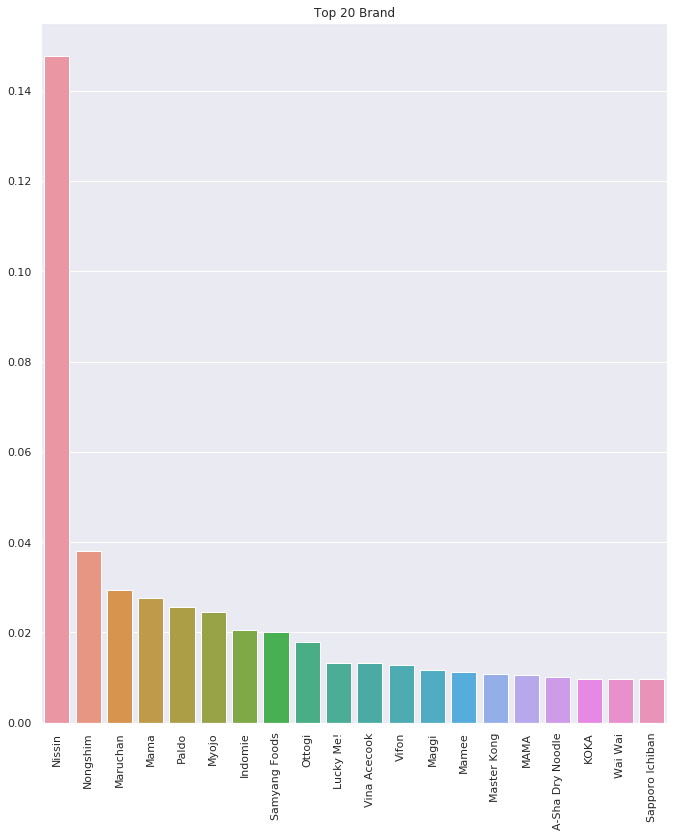

In [102]:
brand_c_20 = brand_c[:20]
fig = plt.figure(figsize=(10, 12))
ax = sns.barplot(x=brand_c_20.index, y=[count/sum(brand_c) for count in brand_c_20])
ax.set_title('Top 20 Brand')
ax.set_xticklabels(brand_c_20.index, rotation=90);

In [103]:
stars_c = df_ramen['Stars'].value_counts()
stars_c

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
0           26
1           26
2.25        21
0.5         14
0.25        11
5.0         10
1.25        10
3.50         9
5.00         7
4.00         6
4.3          4
4.0          3
Unrated      3
3.8          3
4.50         3
3.1          2
3.0          2
2.9          2
4.125        2
2.3          2
2.8          2
1.1          2
2.85         1
0.9          1
2.1          1
3.2          1
3.00         1
3.125        1
3.4          1
3.65         1
3.3          1
3.7          1
2.125        1
0.75         1
1.8          1
3.6          1
0.1          1
Name: Stars, dtype: int64

In [104]:
# 현재 데이테프레임에 있는 Stars에 평가값이 있으나 아래와 같이 오류가 생기므로 index에 다시 stars를 하나하나 집어 넣기 위함
# None of [Index(['3.75', '1', '2.25', '2.75', '3.75',..., 1.5', '2', '3', '1', '2.5', '3.5', '1', '2', '2', '0.5'],\n dtype='object', length=2580)] are in the [columns]"
df_stars = df_ramen[df_ramen['Stars'] != 'Unrated']
df_stars.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


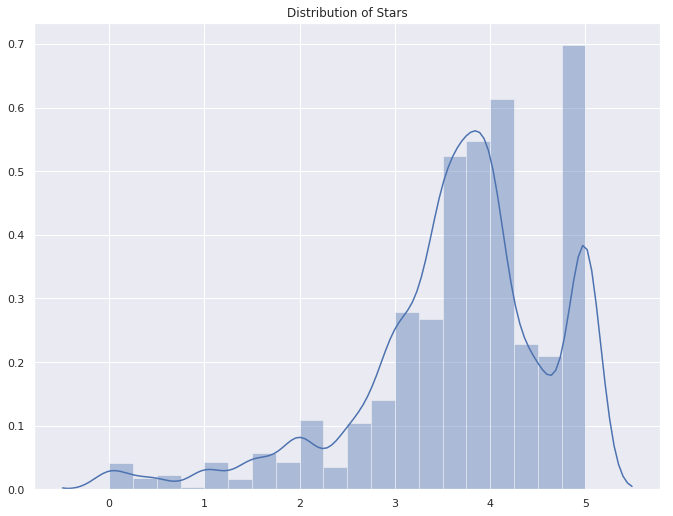

In [111]:
#

fig = plt.figure(figsize=(10, 8))
ax = sns.distplot([float(star) for star in df_stars['Stars']], norm_hist = True, bins=20, kde = True)
ax.set_title('Distribution of Stars');

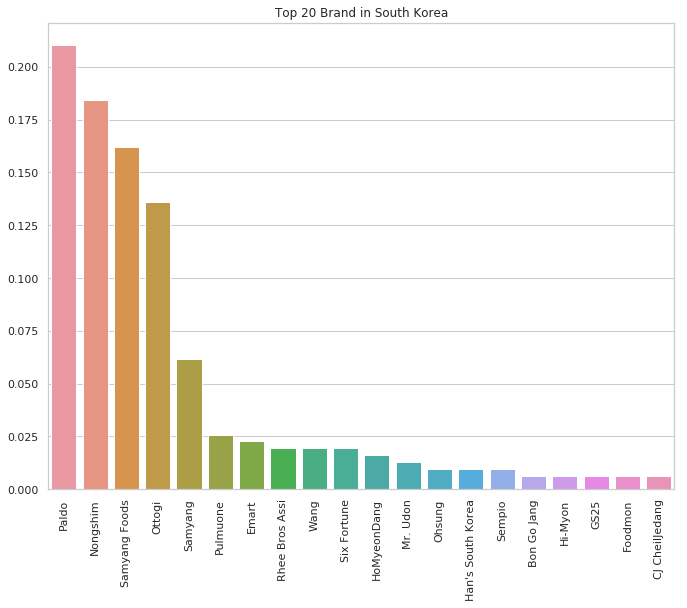

In [113]:
sns.set(style="whitegrid")
def plot_top_brand(country):
    brand_c = df_ramen[df_ramen['Country'] == country]['Brand'].value_counts()
    brand_c_20 = df_ramen[df_ramen['Country'] == country]['Brand'].value_counts()[:20]
    
    fig = plt.figure(figsize=(10, 8))
    ax = sns.barplot(x=brand_c_20.index, y=[count/sum(brand_c) for count in brand_c_20])
    ax.set_title('Top 20 Brand in {}'.format(country))
    ax.set_xticklabels(brand_c_20.index, rotation=90);
    
plot_top_brand('South Korea')

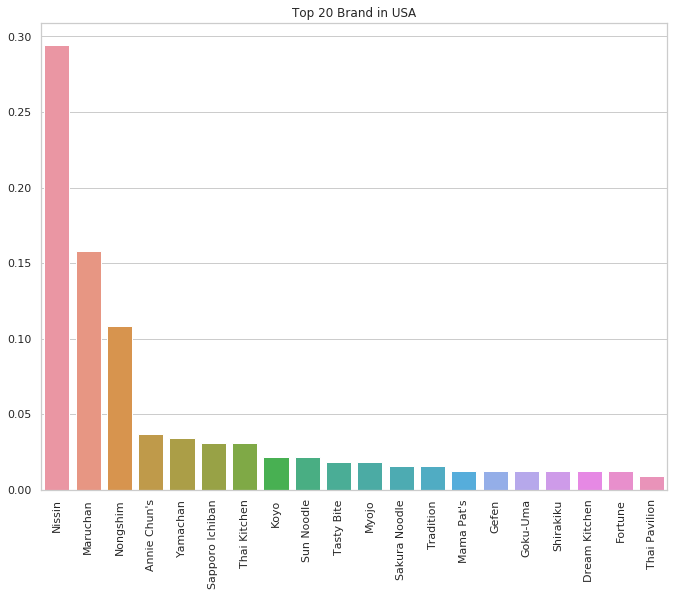

In [96]:
plot_top_brand('USA')

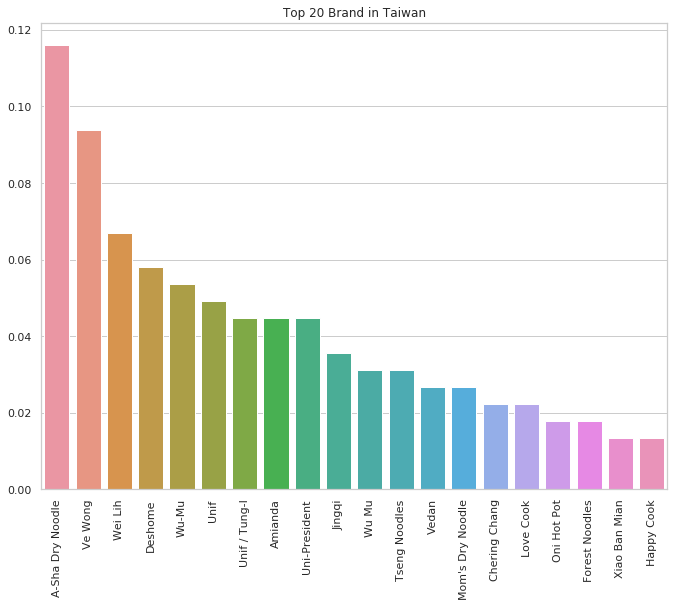

In [97]:
plot_top_brand('Taiwan')

Text(0.5, 0.98, 'Ramen Ratings')

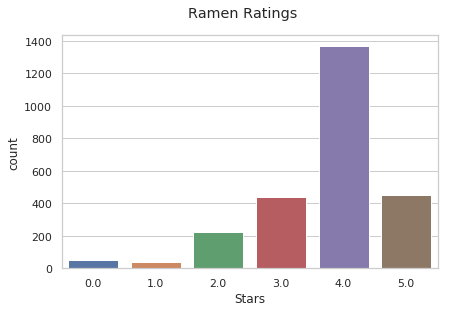

In [93]:
# np.round 사용하여 소숫점 반올림 처리하기
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")


sns.countplot(np.round(df_ramen['Stars'].replace('Unrated', np.nan).dropna().astype(np.float64)))
plt.suptitle("Ramen Ratings")

Text(0.5, 0.98, 'Ramen Ratings')

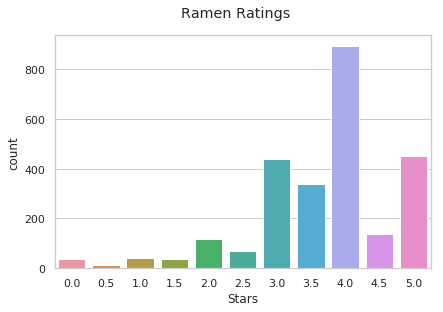

In [94]:
sns.countplot(
    np.round(df_ramen['Stars'].replace('Unrated', np.nan).dropna().astype(np.float64) * 2) / 2
)

plt.suptitle("Ramen Ratings")